# Machine Learning - DSIT UOA

*** Assignment 1 ***

<u>**Contributors:**</u> Christina Borovilou (ds1200008), Ilias Stylianos Karampasis (ds1200005), Anastasia Rempoulaki (ds1200016)

General comments regarding the below deliverables:

- Each question can be run independently and all code regarding its solution has been grouped in a collapsible heading for better and easier observation. *In case of you are using Anaconda, extensions for jupyter notebooks must be installed and then enabling of collapsible heading if you want to use this functionalilty. See more here: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html*
- We distributed the work for each problem. So although everyone in the team has knowledge of the solution for every individual question, you are going to observe diffent coding styles and perhaps level of details in commenting.

## Problem 1

### 1.1

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
import math

Function to generate our **Input** & **"Experimental"** Results in arrays

In [ ]:
def y_actual_res(th0, th1, th2, th3, th5, r_step, r__start, r__end):

    x = np.linspace(r_start, r_end, num= N)     #includes 2 in range [0,2]
    noise = np.random.normal(mu,math.sqrt(variance), size=(20,)) 
    y = th5*x**5 + th3*x**3 + th2*x**2 + th1*x + th0 + noise
    y_true = th5*x**5 + th3*x**3 + th2*x**2 + th1*x + th0

    return(x, y, y_true)

Actual polynomial model parameters and Sample range

In [ ]:
#polynomial weights
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

mu, variance = 0, 0.1 # mean and standard deviation of Input noise
noise = np.random.normal(mu,math.sqrt(variance), [20,])

#Input data range
r_start = 0
r_end = 2
N  = 20
step = (r_end - r_start) / N


*Assign values to {x, y} set*

In [ ]:
x, y, y_true = y_actual_res(th0, th1, th2, th3, th5, step, r_start, r_end)

Predict Results $\rightarrow$
*Compute parameters from Input data of the $5^{th}$ degree polynomial model with Least Squares method*

In [ ]:
# plotting the points 
plt.plot(x, y, marker='o',linewidth=0, label = 'experiment input', ) 

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('Experiments Input') 

# function to show the plot 
plt.legend()
plt.show() 

*Parameter*

In [ ]:
poly_deg = 5

 *Build vector **$X$**: [1  $x$  $x^{2}$  $x^{3}$  $x^{5}$] in range [0,2] of N points to use for trainning*

In [ ]:
Q_train = np.zeros(shape = (N,poly_deg+1))
Q_train[:,0] = 1

for i in range(1,poly_deg+1):
    Q_train[:,i] = np.power(x,i).reshape((N,))


*Parameter $Θ$ Calculation with train data*

In [ ]:
#theta = ((X.T * X)^-1) * Χ.Τ * Υ
theta = np.linalg.pinv(Q_train.T.dot(Q_train)).dot(Q_train.T).dot(y)

plt.plot(x,Q_train.dot(theta), marker='o',linewidth=0, label='polynomial fit degree =' + str(poly_deg))
plt.legend()
plt.show()

Calculation of **MSE (Mean Square Error)** of y over the training set.

In [ ]:
y_act = y_true
y_pred = Q_train.dot(theta)
summation = 0  #variable to store the summation of differences
n = len(y_act) #finding total number of items in list
for i in range(len(y_act)):  #looping through each element of the list
    difference = y_act[i] - y_pred[i]  #finding the difference between observed and predicted value
    squared_difference = pow(difference,2)  #taking square of the differene 
    summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

### 1.2

In [ ]:
#  Problem 1 - ii - Least Squares Regression

# importing the required modules 
import matplotlib.pyplot as plt 
import numpy as np
import math

Below you can see a function to acquire the **y train data** for a <u>N size input vector</u> from a given $5^{th}$ degree polynomial with *random i.i.d. noise samples* originating from a Gaussian distribution added for each point.

In [ ]:
def get_y_train(t0, t1, t2, t3, t4, t5, mean, variance, N, x_input):

    noise = np.random.normal(mean,math.sqrt(variance), size=(N,)) # An N-size vector of random gaussian noise samples with mean value equal to "mean" variable and variance equal to "variance" variable
    y = t5*x_input**5 + t4*x_input**4 + t3*x_input**3 + t2*x_input**2 + t1*x_input + t0 + noise # The N-size vector of our y_train data

    return (y)

Below you can see a function to acquire the **y estimates** given x and y train data, the degree of the polynomial model and the size of train data vectors.

In [ ]:
def get_y_est(poly_deg, x_train, y_train, N):

    Phi = np.zeros(shape = (N,poly_deg+1)) # initialize the Phi matrix with the correspondent dimensions as determined by theory
    Phi[:, -1] = 1 # the last column (corrensponding to the fixed term of the polynomian) is set to have 1 as value for all rows

    for i in range(0,poly_deg):
        Phi[:,i] = np.power(x_train,i+1) # calculating the rest values for Phi matrix as powers of the x_train vector

    # calculating the estimates for the thetas according to the theory type for Least Squared method for Generalized Linear Regression (white gaussian noise)
    theta = np.linalg.pinv(Phi.T.dot(Phi)).dot(Phi.T).dot(y_train) 
    y_est = Phi.dot(theta) # calculating y estimates
    return (y_est)

The below function calculates the **mean** and **variance** for each point for *exp_num experiments* (noise in train data is variable) and then **plots them along with the curve corresponding to the true model**.

In [ ]:
def plot_pol_est_result(pol_deg, N, x_t, exp_num, t0, t1, t2, t3, t4, t5, mean, variance):
    experiments = [] # list gathering the results for each experiment
    for i in range(0,exp_num):
        y_train = get_y_train(t0, t1, t2, t3, t4, t5, mean, variance, N, x_t) # acquire train data for each experiment

        experiments.append(get_y_est(pol_deg, x_t, y_train, N)) # append estimates for experiment

    ##### Expected Value calculation
    E_Y = np.zeros(N)
    for i in range(0, exp_num):
        E_Y = E_Y + experiments[i]

    E_Y = E_Y / exp_num

    print('Results for polynomial of degree: ', pol_deg, '\n')
    print('Mean values: \n')
    print(E_Y)
    print('\n')

    ##### Variance calculation 
    var_Y = np.zeros(N)
    for i in range(0, exp_num):
        var_Y = var_Y + (experiments[i] - E_Y)**2

    var_Y = var_Y / exp_num

    print('Variance values: \n')
    print(var_Y)
    print('\n')

    #### True model calculation
    x_true = np.linspace(0, 2, 100) # to simulate continuity we increase the number of points
    y_true = t5*x_true**5 + t3*x_true**3 + t2*x_true**2 + t1*x_true + t0 # true model has no noise added

    plt.plot(x_true, y_true, '-g', label= 'true_model')

    plt.errorbar(x_t, E_Y, marker='o', markersize='2', linewidth=0, yerr= var_Y, elinewidth = 1, capsize = 5, label='polynomial LS regression degree: ' + str(pol_deg))

    # naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('y - axis') 

    # giving a title to my graph 
    plt.title('True model vs Polynomial Least Squares Regression') 

    # function to show the plot 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.show()

Below we utilize the above defined fucntions to run the experiments **at first for a $2^{nd}$ degree** polynomial and **then for a $10^{th}$ degree** one.

In [ ]:
# polynomial factors of true model used in experiments
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

# data range
r_start, r_end = 0, 2
# number of points
points_number  = 20
# number of experiments
experiments_number = 100
# mean, variance values for Gaussian noise
noise_mean, noise_variance = 0, 0.1
# take "points_number" equidistant points in [r_start, r_end]
x_train = np.linspace(r_start, r_end, num= points_number)

# run experiments for 2nd degree polynomial
plot_pol_est_result(2, points_number, x_train, experiments_number, th0, th1, th2, th3, 0, th5, noise_mean, noise_variance)
print('\n')
# run experiments for 10th degree polynomial
plot_pol_est_result(10, points_number, x_train, experiments_number, th0, th1, th2, th3, 0, th5, noise_mean, noise_variance)

<u>**Conclusions:**</u>

As expected, the **$2^{nd}$ degree** polynomial <u>does not produce a good estimate</u> of the true model which is of **$5^{th}$ degree**. On the other hand, the **$10^{th}$ degree** polynomial <u>fits much better (maybe even overfits)</u> the true model. However, we have to mention that **the variance** of y points is <u>much greater in the second case</u>.

**This is justified by the bias-variance dilemma**: *For <u>a fixed number</u> of train points (in our case 20), as the complexity of the estimator is increased the bias becomes smaller, but the variance of the estimates become higher because there are more free parameters to estimate between changing train set*.

So for the $2^{nd}$ degree polynomial we have high bias, but generally small variance and for the $10^{th}$ degree polynomial we succeed in minimizing bias, but with the cost of much higher variance for our estimates. **In order to avoid this and minimize both terms, we need to gradually and carefully increase the number of train points and the complexity of the model.**

### 1.3

*Importing required modules*

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import math

*Function to generate our Input & "Experimental" Results in arrays*

In [ ]:
def x_y_actual(t0, t1, t2, t3, t5, r_step, r__start, r__end,sig):

    _x = np.linspace(r__start, r__end, num= N)               #input range [0,2] including 2 
    noise = np.random.normal(mu,math.sqrt(sig), size=(N,))   #adding random noise of input data
    _y = t5*_x**5 + t3*_x**3 + t2*_x**2 + t1*_x + t0 + noise 
    _y_true  = t5*_x**5 + t3*_x**3 + t2*_x**2 + t1*_x + t0 

    return(_x, _y, _y_true)

*Actual polynomial model parameters and Sample range*

In [ ]:
#polynomial weights
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

#Input data range
r_start = 0
r_end = 2
N  = 20
step = (r_end - r_start) / N

# mean and standard deviation of Input noise
mu, sigma = 0, 0.1   

*Assign values to {x, y} set*

In [ ]:
x, y , y_true = x_y_actual(th0, th1, th2, th3, th5, step, r_start, r_end, sigma)

Predict Results $\rightarrow$
*Compute parameters from Input data of the $5^{th}$ degree polynomial model with Ridge Regression*


*Parameters*

In [ ]:
poly_deg = 5
lamda = 0.02   #Optimal value is selected by MSE least value, compputed below

 *Build vector **$X$**: [1  $x$  $x^{2}$  $x^{3}$  $x^{5}$] in range [0,2] of N points to use for trainning*

In [ ]:
Q_train = np.zeros(shape = (N,poly_deg+1))
Q_train[:,0] = 1
for i in range(1,poly_deg+1):
    if i!=4:         #we do not want term x^4 to contribute
        Q_train[:,i] = np.power(x,i).reshape((N,))   #[x, x^2, x^3, x^5] of input data x ∈ [0,2]

*Parameter $Θ$ Calculation with train data*

In [ ]:
#closed form solution for theta = ((X.T * X + λΙ)^-1) * Χ.Τ * Υ
theta = np.linalg.pinv((Q_train.T.dot(Q_train) + lamda*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)
print('Theta value is:\n',str(theta))

*Check MSE behaviour vs different $λ$ values & plot them*

In [ ]:
import math

sample_shp = 500

# Initialize arrays
mse = np.zeros((sample_shp))
mse_better = np.zeros((sample_shp))

# Define lamda values range & density
l_str = 0
l_end = 2.0
step_l = (l_end - l_str) / sample_shp
lamd_range = np.arange(l_str ,l_end, step_l)  
i,m =0, 0
for lamda in lamd_range:

    #closed form solution for theta = ((X.T * X + λΙ)^-1) * Χ.Τ * Υ
    theta = np.linalg.pinv((Q_train.T.dot(Q_train) + lamda*np.eye(poly_deg+1))).dot(Q_train.T).dot(y)

    prev = 0 
    for k in range(len(y)):
    
        mse[i] = prev + pow(Q_train.dot(theta)[k] - y_true[k],2)  
        prev =  mse[i]

    if mse[i] < mse[0]:
        mse_better[i] = mse[i]


    i = i+1

opt = np.argmin(mse)    #index of optimal lamda (least value of MSE)
mse_better[ mse_better==0 ] = np.nan

# Plot to see the dependency

plt.plot(lamd_range, mse_better , 'r|',linewidth=0, label='MSE better than LS for these lamda',markersize=6)
plt.plot(lamd_range, mse, 'k.',linewidth=0, label='MSE vs lamda',markersize=2)
plt.plot(lamd_range[opt], mse[opt], 'g^',linewidth=0, label='optimal lamda')
plt.legend()
plt.show()


**Optimal Lamda**

In [ ]:
found =  mse[opt] - min(mse)
print('Ridge regression Method.\nFor the optimal value of lamda = ', str(lamd_range[opt]),", the least MSE is= ", str(round(mse[opt],3)))
print("\n\nLeast Squares Method:\nMSE=",str((round(mse[0],3))))


<u>**Conclusions:**</u>

From the graph above we can observe that for different values of lamda, exist some values (noted with red line) for which, MSE value is reduced compared with the MSE using Least Squares method(*λ*=0). Giving that, we can conclude that adding proper value of bias can improve the predictions of the problem.

### 1.4

In [ ]:
#  Assignment 1 - iv - Full Bayesian Regression (θο equal to true parameter vector)

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
import random
import math

Below you can see a function to acquire the **y train data** for a <u>N size input vector</u> from a given $5^{th}$ degree polynomial with *random i.i.d. noise samples* originating from a Gaussian distribution added for each point.

In [ ]:
def get_y_train(t0, t1, t2, t3, t4, t5, mu, variance, N, x):

    noise = np.random.normal(mu,math.sqrt(variance), size=(N,))  # An N-size vector of random gaussian noise samples with mean value equal to "mean" variable and variance equal to "variance" variable
    y = t5*x**5 + t4*x**4 + t3*x**3 + t2*x**2 + t1*x + t0 + noise # The N-size vector of our y_train data

    return (y)

We use the true parameter vector as the mean $θ_{0}$. We also get 20 random test points in [0, 2] interval.

In [ ]:
th = [-1, 0.9, 0.7, 0, -0.2, 0.2] # true paremeter vector
random.seed()
x_random = np.array([])
for i in range(0, 20):
    x_random = np.append(x_random, [random.random()*2]) # random.random() return random points in [0, 1] therefore we multiply with 2

i) 1st case:
   Ν = 20 , $σ_{η}^{2}$ = 0.05, $σ_{θ}^{2}$ = 0.1 

We assign the values which are necessary for this case on the variables sigma_h, N, sigma_theta.

In [ ]:
sigma_h = 0.05
N = 20
sigma_theta = 0.1


The true model structure is used in order to construct the **matrix Phi**.

In [ ]:
x_train = np.linspace(0, 2, num= N) # get N equidistant point in [0, 2] inverval
y_train = get_y_train(th[5], th[0], th[1], th[2], th[3], th[4], 0, sigma_h, N, x_train) # get the y train data for the given input and parameters

pol_degree = 5

Phi = np.zeros(shape = (N,(pol_degree + 1))) # 6 = polynomial degree + 1
Phi[:, -1] = 1 # last column, all rows equal to 1 for the fixed term of θ_0

phi_x_random = [] # this is going to be used for calculating y estimates for the random points
for i in range(0,5):
    phi_x_random.append(np.power(x_random,i+1)*th[i]) # φ(x) matrix calculation (actually φ(x) is a vector but here is a matrix because we compute its values for all points in x_random vector)
    Phi[:,i] = np.power(x_train,i+1)*th[i] # Φ calculation

phi_x_random.append(np.array([1]*x_random.shape[0]))  # append a vector of ones as last element, according to theory



We calculate the predicted values of y and we plot them corresponding to the input value x (blue points of the diagram).

In [ ]:
est_th_y = th + 1 / sigma_h * np.linalg.inv(1 / sigma_theta * np.eye(6) + 1 / sigma_h * Phi.T.dot(Phi)).dot(Phi.T).dot(y_train - Phi.dot(th))

# print('μ_θ_y:')
# print(est_th_y)
# print('\n')
phi_x_random = np.array(phi_x_random) # turn the list into an array

est_y = phi_x_random.T.dot(est_th_y) # calculation of the estimates of the model full bayesian inference produce, for the points in x_random vector

sigma_y = sigma_h + sigma_h * sigma_theta * phi_x_random.T.dot(np.linalg.inv(sigma_h * np.eye(6) + sigma_theta * Phi.T.dot(Phi))).dot(phi_x_random) # variance - covariance matrix
y_var = sigma_y.diagonal()

#### True model calculation
x_true = np.linspace(0, 2, 100) # to simulate continuity we increase the number of points
y_true = th[4]*x_true**5 + th[2]*x_true**3 + th[1]*x_true**2 + th[0]*x_true + th[5] # true model has no noise added

plt.errorbar(x_random, est_y, marker= 'o', markersize=2, linewidth=0, yerr= y_var, elinewidth = 1, capsize = 5, label='bayes')
plt.plot(x_true, y_true, '-g', linewidth=2, label= 'true_model')

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('True Model vs Full Bayesian Inference Regression') 

# function to show the plot 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

ii) 2nd case:
Ν = 20 , $σ_{η}^{2}$ = 0.05, $σ_{θ}^{2}$ = 0.1 

We assign the values which are necessary for this case on the variables sigma_h, N, sigma_theta. The same random points are going to be used in order to extract useful and meaningful conclusions.

In [ ]:
sigma_h = 0.15
N = 20
sigma_theta = 0.1

The true model structure is used in order to construct the **matrix Phi**.

In [ ]:
x_train = np.linspace(0, 2, num= N)
y_train = get_y_train(th[5], th[0], th[1], th[2], th[3], th[4], 0, sigma_h, N, x_train)

pol_degree = 5
Phi = np.zeros(shape = (N,(pol_degree + 1))) # 6 = polynomial degree + 1
Phi[:, -1] = 1

phi_x_random = [] # in fact the calculation of phi_x_random could have been avoided, since the paremeters it's depending on did not change, but we recalculate it here for independence of experiments
for i in range(0,5):
    phi_x_random.append(np.power(x_random,i+1)*th[i])
    Phi[:,i] = np.power(x_train,i+1)*th[i]

phi_x_random.append(np.array([1]*x_random.shape[0]))

We calculate the predicted values of y and we plot them corresponding to the input value x (blue points of the diagram).

In [ ]:
est_th_y = th + 1 / sigma_h * np.linalg.inv(1 / sigma_theta * np.eye(6) + 1 / sigma_h * Phi.T.dot(Phi)).dot(Phi.T).dot(y_train - Phi.dot(th))

# print('μ_θ_y:')
# print(est_th_y)
# print('\n')
phi_x_random = np.array(phi_x_random) # turn the list into an array

est_y = phi_x_random.T.dot(est_th_y) # calculation of the estimates of the model full bayesian inference produce, for the points in x_random vector


# print('μ_y:')
# print(est_y)
# print('\n')

# calculation of errors/variances for the estimates (variance - covariance matrix)
sigma_y = sigma_h + sigma_h * sigma_theta * phi_x_random.T.dot(np.linalg.inv(sigma_h * np.eye(6) + sigma_theta * Phi.T.dot(Phi))).dot(phi_x_random) # variance - covariance matrix
# we keep only the elements of the diagonal of the covariance matrix which correspond to the variances we are interested in 
y_var = sigma_y.diagonal() 


#### True model calculation
x_true = np.linspace(0, 2, 100)
y_true = th[4]*x_true**5 + th[2]*x_true**3 + th[1]*x_true**2 + th[0]*x_true + th[5]

plt.errorbar(x_random, est_y, marker= 'o', markersize=2, linewidth=0, yerr= y_var, elinewidth = 1, capsize = 5, label='bayes')
plt.plot(x_true, y_true, '-g', linewidth=2, label= 'true_model')

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('True Model vs Full Bayesian Inference Regression') 

# function to show the plot 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

<u>**Conclusions:**</u>

As it is clear the value of N = 20 is large enough in order to have the best predictions. Moreover, we can observe that the larger the noise variance is, the larger the error bars (the variance of estimations/predictions) become.

### 1.5

In [ ]:
#  Problem 1 - v - Full Bayesian Regression (mean vector θο not equal to true parameter vector)

# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
import random
import math

Below you can see a function to acquire the **y train data** for a <u>N size input vector</u> from a given $5^{th}$ degree polynomial with *random i.i.d. noise samples* originating from a Gaussian distribution added for each point.

In [ ]:
def get_y_train(t0, t1, t2, t3, t4, t5, mu, variance, N, x):

    noise = np.random.normal(mu,math.sqrt(variance), size=(N,)) # An N-size vector of random gaussian noise samples with mean value equal to "mean" variable and variance equal to "variance" variable
    y = t5*x**5 + t4*x**4 + t3*x**3 + t2*x**2 + t1*x + t0 + noise # The N-size vector of our y_train data

    return (y)

Below you can see a function that **implements full bayesian inference** for *N training points* and with *variance sigma_theta for the Gaussian function of the prior*. The **mean vector $θ_{0}$** is <u>following the correct model as for the polynomial degree but with different values from the true model</u>. Finally a plot of the estimates and their errors for the points in the x_random vector is drawn.

In [ ]:
def bayesian_inference(N, sigma_theta, x_random):

    x_train = np.linspace(0, 2, num= N) # get N equidistant point in [0, 2] inverval
    th = [-1, 0.9, 0.7, 0, -0.2, 0.2]  # true paremeter vector
    theta_zero = np.array([-10.54, 0.465, 0.0087, 0, -0.093, -0.004]) # get the array from a list of values for mean θ0 vector
    sigma_h = 0.05 # variance of the noise gaussian model

    y_train = get_y_train(th[5], th[0], th[1], th[2], th[3], th[4], 0, sigma_h, N, x_train) # get the y train data for the given input and parameters

    Phi = np.zeros(shape = (N,6)) # 6 = polynomial degree + 1
    Phi[:, -1] = 1 # last column, all rows equal to 1 for the fixed term of θ_0

    phi_x_random = [] # this is going to be used for calculating y estimates for the random points
    for i in range(0,5):
        phi_x_random.append(np.power(x_random,i+1)*theta_zero[i]) # φ(x) matrix calculation (actually φ(x) is a vector but here is a matrix because we compute its values for all points in x_random vector)
        Phi[:,i] = np.power(x_train,i+1)*theta_zero[i] # Φ calculation

    phi_x_random.append(np.array([1]*x_random.shape[0])) # append a vector of ones as last element, according to theory

    est_th_y = theta_zero + 1 / sigma_h * np.linalg.inv(1 / sigma_theta * np.eye(6) + 1 / sigma_h * Phi.T.dot(Phi)).dot(Phi.T).dot(y_train - Phi.dot(theta_zero)) # calculation of estimates for θ vector for the given y train data

    # print('μ_θ_y:')
    # print(est_th_y)
    # print('\n')
    phi_x_random = np.array(phi_x_random) # turn the list into an array

    est_y = phi_x_random.T.dot(est_th_y) # calculation of the estimates of the model full bayesian inference produce, for the points in x_random vector

    # print('μ_y:')
    # print(est_y)
    # print('\n')

    sigma_y = sigma_h + sigma_h * sigma_theta * phi_x_random.T.dot(np.linalg.inv(sigma_h * np.eye(6) + sigma_theta * Phi.T.dot(Phi))).dot(phi_x_random) # calculation of errors/variances for the estimates (variance - covariance matrix)
    y_var = sigma_y.diagonal() # we keep only the elements of the diagonal of the covariance matrix which correspond to the variances we are interested in 

    #### True model calculation
    x_true = np.linspace(0, 2, 100) # to simulate continuity we increase the number of points
    y_true = th[4]*x_true**5 + th[2]*x_true**3 + th[1]*x_true**2 + th[0]*x_true + th[5] # true model has no noise added

    plt.errorbar(x_random, est_y, marker= 'o', markersize=2, linewidth=0, yerr= y_var, elinewidth = 1, capsize = 5, label='full bayesian inference N: ' + str(N) + ', σ_θ: ' + str(sigma_theta))
    plt.plot(x_true, y_true, '-g', linewidth=1, label= 'true_model')

    # naming the x axis 
    plt.xlabel('x - axis') 
    # naming the y axis 
    plt.ylabel('y - axis') 

    # giving a title to my graph 
    plt.title('True Model vs Full Bayesian Inference Regression') 

    # function to show the plot 
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

We get **20 random points in [0, 2] interval** and use the same in each experiment for better and more meaningful comparisons and conclusions. Then we run the 4 seperate experiments.

In [ ]:
random.seed()
x_random = np.array([])
for i in range(0, 20):
    x_random = np.append(x_random, [random.random()*2]) # random.random() return random points in [0, 1] therefore we multiply with 2

bayesian_inference(20, 0.1, x_random) # N = 20, sigma_theta = 0.1
print('\n')
bayesian_inference(20, 2, x_random) # N = 20, sigma_theta = 2
print('\n')
bayesian_inference(500, 0.1, x_random) # N = 500, sigma_theta = 0.1
print('\n')
bayesian_inference(500, 2, x_random) # N = 500, sigma_theta = 2

<u>**Conclusions:**</u>

*The results we get for the above 4 experiments were the expected ones according to theory.*

The first safe comment that we can make is that <u>for a fixed number of points</u>, **as the variance (uncertainty) of the prior increases, we get better fit for**, <u>which is normal in our case</u>: we have adopted a model correct regarding the degree of the polynomial but **we are not certain about our initial estimates for $θ_{0}$** mean vector of the prior. Therefore **greater variance takes this into account and produces better predictions**.

Furthermore, **our estimates approximate/fit better the true model curve as the N increases while keeping constant the variance of the prior**. This is also justified, since <u>more training points is natural to give better results for our prediction even with small variance of the prior</u>.

In general as we **increase both the number of training points and the variance of the prior, we get better estimation of the true model**. <u>Also, we do not observe significant differences in the errors of the estimates</u>, although it seems to become a little smaller for greater N and slightly greater as $σ_{θ}$ increases (normal according to theory equation).

### 1.6

Expectation Maximization Method

In [ ]:
# importing the required module 
import matplotlib.pyplot as plt 
import numpy as np
import random
import math

Generate Training Data function

In [ ]:
#Build  N = 500 sample Data (training data set) in [0,2] that follow the form y = th0 + th1.x + th2.x^2 + th3.x^3 + th5.x^5 (Eq.1)  with sigma^2=0.05.
def y_training_set(t0, t1, t2, t3, t5, mu,variance, N_sam, r__start, r__end):

    x = np.linspace(r_start, r_end, num= N_sam)     #includes 2 in range [0,2]
    noise = np.random.normal(mu,math.sqrt(variance), size=(N_sam,))  
    y = t5*x**5 + t3*x**3 + t2*x**2 + t1*x + t0 + noise
    
    return(x, y)

Parameter Values

In [ ]:
#Vector Parameter (True)
th0 = 0.2
th1 = -1
th2 = 0.9
th3 = 0.7
th5 = -0.2

#data range
r_start = 0
r_end = 2
N  = 500

mu, sigma = 0, 0.05 # mean and standard deviation

th = [-1, 0.9, 0.7, 0, -0.2, 0.2]  # true paremeter vector

Train Set

In [ ]:
x, y = y_training_set(th0, th1, th2, th3, th5, mu,sigma,N, r_start, r_end)

Test Set

In [ ]:
random.seed()
x_random = np.array([])
for i in range(0, 20):
    x_random = np.append(x_random, [random.random()*2])

Phi = np.zeros(shape = (N,6)) # 6 = polynomial degree + 1
Phi[:, -1] = 1

phi_x_random = []
for i in range(0,5):
    phi_x_random.append(np.power(x_random,i+1)*th[i])
    Phi[:,i] = np.power(x,i+1)*th[i]

phi_x_random.append(np.array([1]*x_random.shape[0]))
phi_x_random = np.array(phi_x_random)

Expectation-Maximization Repetitions in order to aproximate the values of $σ_{η}$ & $σ_{θ}$

In [ ]:
# Define convergence threshold
e = 0.0001

k = 6 # θ dimensionality

a_temp = 1 #sigma-theta^-2
b_temp = 1 #sigma-ita^-2

A = 0.0   #A capital
B  = 0.0   #B capital
step = 1

while True:  #random range of iretations to make sure it converges. Instead should be a_temp-a_temp(previous)< e & b_temp-b_temp(previous)< e

    # Replace the equations of EM 
    sigma2_th_wrt_y = np.linalg.inv(a_temp * np.eye(Phi.shape[1]) + b_temp * (Phi.T).dot(Phi))   #Σ.θ|y = (αI+bΦ.ΤΦ) ^-1
    mi_th_wrt_y = b_temp * ((sigma2_th_wrt_y.dot(Phi.T)).dot(y))   #μ.θ|y = β*Σ.θ|y*Φ.Τ*y

    a_tmp_prev = a_temp
    b_tmp_prev = b_temp

    A = np.linalg.norm(mi_th_wrt_y)**2  + np.matrix.trace(sigma2_th_wrt_y)    # ||μ.θ|y ||^2 + trace(Σ.θ|y)
    B  = np.linalg.norm(y-Phi.dot(mi_th_wrt_y))**2 + np.matrix.trace(Phi.dot(sigma2_th_wrt_y).dot(Phi.T))   # ||y-Φμ.θ|y ||^2 + trace(Φ*Σ.θ|y*Φ.Τ)

    a_temp = k/A
    b_temp = N/B
    
    differ_a =  abs(a_temp - a_tmp_prev)     # a_temp-a_temp(j-1)< e 
    differ_b =  abs(b_temp  - b_tmp_prev)    #& b_temp-b_temp(j-1)<e
    
    print('\n',step, '. ' , 'σ_{θ} = ' , round((1/a_temp),3), 'σ_{η} = ' , round((1/b_temp),3))
    print("\n   Διαφορά από Επανάληψη: ",  round(differ_a,5),   round(differ_b,5) )
    if (differ_a < e and differ_b < e):
        break
    step += 1

Calculate final $σ_{η}$ & $σ_{θ}$

In [ ]:
# calculate Σ_θ_y and μ_θ_y for converged a_temp and b_temp
sigma2_th_wrt_y = np.linalg.inv(a_temp * np.eye(Phi.shape[1]) + b_temp * (Phi.T).dot(Phi))   #Σ.θ|y = (αI+bΦ.ΤΦ) ^-1
mi_th_wrt_y = b_temp * ((sigma2_th_wrt_y.dot(Phi.T)).dot(y))   #μ.θ|y = β*Σ.θ|y*Φ.Τ*y
est_y = phi_x_random.T.dot(mi_th_wrt_y)
sigma_h = 1/b_temp
sigma_theta = 1/a_temp

Plot Expected points (with uncertainty) together with true model Curve

In [ ]:
sigma_y = sigma_h + sigma_h * sigma_theta * phi_x_random.T.dot(np.linalg.inv(sigma_h * np.eye(6) + sigma_theta * Phi.T.dot(Phi))).dot(phi_x_random) # variance - covariance matrix
y_var = sigma_y.diagonal()

x_true = np.linspace(0, 2, 100)
y_true = th[4]*x_true**5 + th[2]*x_true**3 + th[1]*x_true**2 + th[0]*x_true + th[5]


# plt.plot(x_train, est_y, marker= 'o', markersize=5, linewidth=0, label='bayes')
plt.errorbar(x_random, est_y, marker= 'o', markersize=2, linewidth=0, yerr= y_var, elinewidth = 1, capsize = 5, label='Expectation-Maxizimation')
plt.plot(x_true, y_true, '-g', linewidth=1, label= 'true_model')

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 

# giving a title to my graph 
plt.title('True Model vs Expectation-Maximization Regression') 

# function to show the plot 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

The expectation points follow quite closely the model. 

The prices converged in a small number of repetitions.

## Problem 2

**ATTENTION!**

<u>In order the code in below cells to work properly, the data set files should be in the same folder with the notebook, as we have provided them to you. Otherwise, you should change the path for the file read command.</u>

### 2.1



Import modules



In [ ]:
from csv import reader
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np  
from random import randrange

Function Definitions



> Genereic functions



In [ ]:
def load_file(filename):
    dataset = list()
    with open(filename, 'r') as file:
        file_reader = reader(file)
        for row in file_reader:
            if not row:
                continue
            dataset.append(row)
   
    return dataset


def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())


# Distance of 2 vectors of dataset
def find_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2

    return sqrt(distance)



>KNN algorithm help functions



In [ ]:
 # Locate the most similar neighbors
def find_most_freq_neighbor(knn_num, train_set, test_row):
    distances = list()
    sorted_dist = list()
    neighbors = list()
  
    for i in train_set:
        row_dis = find_distance(i, test_row)
        distances.append((i, row_dis))
  
    # get k neighbors with the smallest distance
    distances.sort(key=lambda tup: tup[1])
    for j in range(knn_num):
        neighbors.append(distances[j][0])
  
    # i want to find in which class belong the majority of the k neighbors
    class_of_knn=most_frequent(neighbors)
    return class_of_knn[-1]



 # We need to create a train set & a test set, compare them & check success percentage
def compute_knn_success_w_cross_val(dataset, n_folds):  #cross_validation_split
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
 
    #   ----------- Fold level --------------------
    for r in range(n_folds):
        fold = list()

        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))  #steal randomly records of the data set & create a group of "len(dataset) / n_folds" records
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)  

#     -------- level of each Group of each Fold --------------------
# Create a train_set, a test_set w/o class specification, & a set of actual class of test set  
    succ_perc_sum = 0
    for grp in dataset_split:
        train_set = list(dataset_split)
        train_set.remove(grp)
        train_set = sum(train_set, [])
        test_set = list()
        actual_test_set = list()

#       ------ level of row of each group of each Fold --------------------
# Empty class info of test set & keep class info in actual test set
        for row in grp:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None               #hide values of test set in order to predict them
            actual_test_set.append(list(row))   #keep actual values of test set

        # Predict values of test set using training set
        for row in test_set:
            row[-1] = find_most_freq_neighbor(num_neighbors, train_set, row)

#     -------- level of each Group of each Fold --------------------
        # Evaluate Prediction vs Reality 
        model_success_percentage = compare_pred_actual_perc(test_set, actual_test_set)
        succ_perc_sum = model_success_percentage +  succ_perc_sum

#     -------- level of each Group of each Fold --------------------
    tot_sucess_perc = succ_perc_sum / n_folds
    return tot_sucess_perc

# Compare Actual values wth predicted to get sucess perentage %
def compare_pred_actual_perc(prediction, actual):
    correct = 0
    for i in range(len(prediction)):
        if actual[i] == prediction[i]:
            correct += 1
        success = correct / len(actual) * 100.0
    return success



>KNN algorithm 
---
It takes input data with the number of neighbors selected and returns percentage of KNN algorithm success



In [ ]:
def kNN(x_filename,num_neighbors):
    filename = x_filename
    x_dataset = load_file(filename)

    # convert input from string to numbers
    row_len = len(x_dataset[0])
    for i in range(row_len-1):    
        str_column_to_float(x_dataset, i)

    # Replace class names with numbers (like a dictionary: 1 for 'Iris-setosa', 2 for 'Iris-setosa', 3 for 'Iris-virginica')
    correlate_dict = dict()
    class_names = set([row[-1] for row in x_dataset])
    for i, cl_name in enumerate(class_names,1):
        correlate_dict[cl_name] = i
    for row in x_dataset:
        row[-1] = correlate_dict[row[-1]]   #here we substitute class name "iris-setosa with 1.. etc.."

    # Split dataset to train and test set, copyning the actual va;ues of test set in actual_test_set
    model_success_percentage = compute_knn_success_w_cross_val(x_dataset, 8)   #for k-fold of cross valid, we set k=8
    return model_success_percentage

*Play with number of neighbors and Datasets*



> Pima Indians Diabetes (try KNN from 2 until 200 neighbors)



In [ ]:
# Initialize variables
perc_list = list()
nn_for_max_propab = 0
max_prop = 0.0

# Problem parameters
r_nn_str= 1
r_nn_end= 200
_filename = 'pima-indians-diabetes.data'

for num_neighbors in range (r_nn_str,r_nn_end):
    perc_list.append(kNN(_filename, num_neighbors))


# Optimal number of neighbors
nn_for_max_propab = np.argmax(perc_list)
max_prop = perc_list[nn_for_max_propab]

print('Maximum percentage of Prediction for this dataset: ', str(round(max_prop,2)), '% using ', str(nn_for_max_propab), ' neighbors' )

neib = range (r_nn_str,r_nn_end)

# x & y axis naming
plt.xlabel('neighbor number of selection') 
plt.ylabel('percentage of model KNN success') 

# title & design of graph 
plt.title(_filename) 
plt.plot(neib, perc_list, marker='o',linewidth=0) 

# function to show the plot 
plt.show() 




>Iris flowers *(& pima-indians-diabetes at same knn range for compare)*



In [ ]:
_filename2 = 'iris.data'
_filename1 = 'pima-indians-diabetes.data'
_filenames = (_filename1, _filename2)


for idx, filename in enumerate(_filenames):
    perc_list = list()
    nn_for_max_propab = 0

    for num_neighbors in range (2,100):
        perc_list.append(kNN(filename, num_neighbors))

    neib = range (2,100)

    if idx%2 == 1:
        colr= 'g'
    else:
        colr= 'b' 

    nn_for_max_propab = np.argmax(perc_list)
    max_prop = perc_list[nn_for_max_propab]
    print('Maximum percentage of Prediction for this dataset: ', str(round(max_prop,2)), '% using ', str(nn_for_max_propab), ' neighbors' )
 

    # Plot Results
    plt.plot(neib, perc_list, marker='o',linewidth=0, color= colr, label = filename) 

    #  x & y axis naming
    plt.xlabel('neighbor number selection') 
    plt.ylabel('percentage of model KNN success') 

    # title of graph 
    plt.title('KNN Model for 2 datasets') 

    # functions to show the plot 
    plt.legend()
    plt.show() 

### 2.2

In [ ]:
#  Problem 2 - ii - Probability Density Function calculation for different assumptions

# importing the required modules

import pandas as pd
import numpy as np
import math

df = pd.read_csv('pima-indians-diabetes.data', delimiter=',', encoding='ISO-8859–1', names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'])

#### 2.2.a

**Assumption:** "*Pdfs are gaussian, with diagonal covariance matrices. Means and covariance matrices of the pdfs are estimated using Maximum Likelihood from the available data.*"

In the next cell we calculate the mean and covariance of the samples belonging in **diabetes class ('Y' = 1)** and then we use these values to calculate the estimation for the correspondent pdf, according to the below equation:

We calculate the mean and the covariance from the next math formulas:
  <br>
  $μ = \frac{1}{Ν} \sum{x_i}$
  <br>
  $Σ = \frac{1}{Ν} \sum{(x_n-μ)^Τ(x_n-μ)}$
  
The proof of these formulas are given as a pdf with the submitted .ipynb file.


In [ ]:
mean_diabetes = np.array([])
features = df.keys() # take the feature keys
features = features.drop('Y') # drop key corresponding to the class value
for key in features:
    # calculate the mean for each feature by summing all values and dividing with their number
    mean_diabetes = np.append(mean_diabetes, [df[key][df['Y'] == 1].sum()/len(df[key][df['Y'] == 1])])

print('mean for diabetes class\n')
print(mean_diabetes)
print('\n')

dimension = len(features) # dimensionality of the problem
variance_diabetes = np.array([]) # initialize of the variance array
covariance_diabetes = np.zeros(shape=(dimension, dimension)) # covariance matrix initialization
N_diabetes = len(df[features[1]][df['Y'] == 1]) # the length of dataset for diabetes ('Υ' == 1)
buffer = 0 # initialization of a buffer for the calculation of sigma
for i in range(0, dimension):
    # calculate (co)variance following the theory equation
    buffer = buffer + ((df[features[i]][df['Y'] == 1] - mean_diabetes[i]).T).dot(df[features[i]][df['Y'] == 1] - mean_diabetes[i])

sigma = buffer/(dimension*N_diabetes)

for i in range(0, dimension):
    covariance_diabetes[i][i] = sigma

print('covariance matrix for diabetes class\n')
print(covariance_diabetes)
print('\n')

df_feat_only_diabetes = df.drop('Y', axis=1)[df['Y'] == 1]
features_array_diabetes = df_feat_only_diabetes.to_numpy()

# the below variables are just intermediate result for the pdf equation, in order to keep it readable
buffer_array = features_array_diabetes-mean_diabetes
deter_cov_diab = np.linalg.det(covariance_diabetes)
cov_diab_inv = np.linalg.inv(covariance_diabetes)

# apply the equation from theory to calculate the pdf estimates
pdf_diabetes = (1 / ( (2*math.pi)**(dimension/2) * (deter_cov_diab**(1/2)))) * np.exp((-1/2)*(buffer_array.dot(cov_diab_inv)).dot(buffer_array.T))

# We avoid using a for loop and use the matrix multiplication because it is optimized in python.
pdf_diabetes = pdf_diabetes.diagonal()

print('pdf estimation for diabetes class\n')
print(pdf_diabetes)
print('\n')

In the next cell we calculate the mean and covariance matrix of the samples belonging in **non diabetes class ('Y' = 0)** and then we use these values to calculate the estimation for the correspondent pdf.

In [ ]:
mean_non_diabetes = np.array([])
# features array has already been computed in above cell
features = df.keys()
features = features.drop('Y')
for key in features:
    # calculate the mean for each feature by summing all values and dividing with their number
    mean_non_diabetes = np.append(mean_non_diabetes, [df[key][df['Y'] == 0].sum()/len(df[key][df['Y'] == 0])])

print('mean for non diabetes class\n')
print(mean_non_diabetes)
print('\n')

dimension = len(features)
variance_non_diabetes = np.array([])
covariance_non_diabetes = np.zeros(shape=(dimension, dimension))
N_non_diabetes = len(df[features[1]][df['Y'] == 0])
buffer = 0
for i in range(0, dimension):
   # calculate (co)variance for each element of the matrix, following the theory equation
   buffer = buffer + ((df[features[i]][df['Y'] == 0] - mean_non_diabetes[i]).T).dot(df[features[i]][df['Y'] == 0] - mean_non_diabetes[i])

sigma = buffer/(dimension*N_non_diabetes)


for i in range(0, dimension):
    covariance_non_diabetes[i][i] = sigma

print('covariance_diabetes\n')
print(covariance_non_diabetes)
print('\n')

df_feat_only_non_diabetes = df.drop('Y', axis=1)[df['Y'] == 0]
features_array_non_diabetes = df_feat_only_non_diabetes.to_numpy()
# the below variables are just intermediate result for the pdf equation, in order to keep it readable
buffer_array = features_array_non_diabetes-mean_non_diabetes
deter_cov_diab = np.linalg.det(covariance_non_diabetes)
cov_diab_inv = np.linalg.inv(covariance_non_diabetes)

# apply the equation from theory to calculate the pdf estimates
pdf_non_diabetes = (1 / ( (2*math.pi)**(dimension/2) * (deter_cov_diab**(1/2)))) * np.exp((-1/2)*(buffer_array.dot(cov_diab_inv)).dot(buffer_array.T))

#We avoid using a for loop and use the matrix multiplication because it is optimized in python.
pdf_non_diabetes = pdf_non_diabetes.diagonal()

print('pdf estimation for non diabetes class\n')
print(pdf_non_diabetes)
print('\n')

<u>**Goodness of fit measument**</u>

In order to calculate **AIC and BIC criterion** values for each class, we calculate firstly log-likelihood L(θ). For the assumption used for pdfs *k* (the number of estimated parameters for our model) is 44 => <u>8 values for means for each $X_{i}$ + 8*(8+1)/2 values because the covariance matrix is symmetric so we have half table plus diagonal</u>. Finally, regarding AIC the **equation for small sample size** is used, since N/k is less than 40.

In [ ]:
### 2.2.a
## k = 8 values for means for each Xi + 8x(8+1)/2 values because the covariance matrix is symmetric so we have half table plus diagonal
k = 8 + 8*9/2

print(-2*np.log(pdf_diabetes).sum())
AIC_diabetes = -2*np.log(pdf_diabetes).sum() + 2 * k + (2*k+1) / (N_diabetes-k-1)
BIC_diabetes = -2*np.log(pdf_diabetes).sum() + k * math.log(N_diabetes)
print('AIC_diabetes: ', AIC_diabetes)
print('BIC_diabetes: ', BIC_diabetes)
AIC_non_diabetes = -2*np.log(pdf_non_diabetes).sum() + 2 * k + (2*k+1) / (N_non_diabetes-k-1)
BIC_non_diabetes = -2*np.log(pdf_non_diabetes).sum() + k * math.log(N_non_diabetes)
print('AIC_non_diabetes: ', AIC_non_diabetes)
print('BIC_non_diabetes: ', BIC_non_diabetes)

#### 2.2.b

**Assumption:** "*Pdfs are gaussian, with non-diagonal covariance matrices. Means and covariance matrices of the pdfs are estimated using Maximum Likelihood from the available data.*"

In the next cell we calculate the mean and covariance matrix of the samples belonging in **diabetes class ('Y' = 1)** and then we use these values to calculate the estimation for the correspondent pdf, according to the below equation:

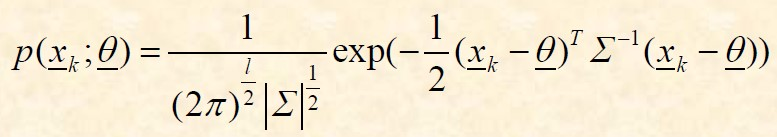

In [ ]:
mean_diabetes = np.array([])
features = df.keys() # take the feature keys
features = features.drop('Y') # drop key corresponding to the class value
for key in features:
    # calculate the mean for each feature by summing all values and dividing with their number
    mean_diabetes = np.append(mean_diabetes, [df[key][df['Y'] == 1].sum()/len(df[key][df['Y'] == 1])])

print('means matrix for diabetes class\n')
print(mean_diabetes)
print('\n')

dimension = len(features) # dimensionality of the problem
covariance_diabetes = np.zeros(shape=(dimension, dimension)) # covariance matrix initialization
for i in range(0, dimension):
    for j in range(0, dimension):
        # calculate (co)variance for each element of the matrix, following the theory equation
        buffer = (df[features[i]][df['Y'] == 1] - mean_diabetes[i])*(df[features[j]][df['Y'] == 1] - mean_diabetes[j])
        covariance_diabetes[i][j] = buffer.sum()/len(buffer)

print('covariance matrix for diabetes class\n')
print(covariance_diabetes)
print('\n')

df_feat_only_diabetes = df.drop('Y', axis=1)[df['Y'] == 1] # get series without class feature, only for diabetes class
features_array_diabetes = df_feat_only_diabetes.to_numpy() # turn series to an array

# the below variables are just intermediate result for the pdf equation, in order to keep it readable
buffer_array = features_array_diabetes-mean_diabetes
deter_cov_diab = np.linalg.det(covariance_diabetes)
cov_diab_inv = np.linalg.inv(covariance_diabetes)

# apply the equation from theory to calculate the pdf estimates
pdf_diabetes = (1 / ( (2*math.pi)**(dimension/2) * (deter_cov_diab**(1/2)))) * np.exp((-1/2)*(buffer_array.dot(cov_diab_inv)).dot(buffer_array.T))

# because we introduce the whole matrix buffer_array in the equation and not point by point, we calculate more results,
# most of them not having actual meaning. Only the diagonal values are the actual pdfs.
# however we avoid using a for loop and use the matrix multiplication because it is optimized in python.
pdf_diabetes = pdf_diabetes.diagonal()
print('pdf estimation for diabetes class\n')
print(pdf_diabetes)
print('\n')

In the next cell we calculate the mean and covariance matrix of the samples belonging in **non diabetes class ('Y' = 0)** and then we use these values to calculate the estimation for the correspondent pdf.

In [ ]:
mean_non_diabetes = np.array([])
# features array has already been computed in above cell
for key in features:
    # calculate the mean for each feature by summing all values and dividing with their number
    mean_non_diabetes = np.append(mean_non_diabetes, [df[key][df['Y'] == 0].sum()/len(df[key][df['Y'] == 0])])

print('means matrix for non diabetes class\n')
print(mean_non_diabetes)
print('\n')

covariance_non_diabetes = np.zeros(shape=(dimension, dimension)) # covariance matrix initialization
for i in range(0, dimension):
    for j in range(0, dimension):
        # calculate (co)variance for each element of the matrix, following the theory equation
        buffer = (df[features[i]][df['Y'] == 0] - mean_diabetes[i])*(df[features[j]][df['Y'] == 0] - mean_diabetes[j])
        covariance_non_diabetes[i][j] = buffer.sum()/len(buffer)

print('covariance matrix for non diabetes class\n')
print(covariance_non_diabetes)
print('\n')

df_feat_only_non_diabetes = df.drop('Y', axis=1)[df['Y'] == 0] # get series without class feature, only for diabetes class
features_array_non_diabetes = df_feat_only_non_diabetes.to_numpy() # turn series to an array

# the below variables are just intermediate result for the pdf equation, in order to keep it readable
buffer_array = features_array_non_diabetes-mean_non_diabetes
deter_cov_non_diab = np.linalg.det(covariance_diabetes)
cov_non_diab_inv = np.linalg.inv(covariance_non_diabetes)

# apply the equation from theory to calculate the pdf estimates
pdf_non_diabetes = (1 / ( (2*math.pi)**(dimension/2) * (deter_cov_non_diab**(1/2)))) * np.exp((-1/2)*(buffer_array.dot(cov_non_diab_inv)).dot(buffer_array.T))

# as already has been stated, because we introduce the whole matrix buffer_array in the equation and not point by point, we calculate more results,
# most of them not having actual meaning. Only the diagonal values are the actual pdfs.
# however we avoid using a for loop and use the matrix multiplication because it is optimized in python.
pdf_non_diabetes = pdf_non_diabetes.diagonal()
print('pdf estimation for non diabetes class\n')
print(pdf_non_diabetes)
print('\n')

<u>**Goodness of fit measument**</u>

In order to calculate **AIC and BIC criterion** values for each class, we calculate firstly log-likelihood L(θ). For the assumption used for pdfs *k* (the number of estimated parameters for our model) is 44 => <u>8 values for means for each $X_{i}$ + 8*(8+1)/2 values because the covariance matrix is symmetric so we have half table plus diagonal</u>. Finally, regarding AIC the **equation for small sample size** is used, since N/k is less than 40.

In [ ]:
## k = 8 values for means for each Xi + 8x(8+1)/2 values because the covariance matrix is symmetric so we have half table plus diagonal
k = 8 + 8*9/2
N_diabetes = len(features_array_diabetes[:,0])
N_non_diabetes = len(features_array_non_diabetes[:,0])

diabetes_loglikelihood = np.log(pdf_diabetes).sum()
AIC_diabetes = -2*diabetes_loglikelihood + 2 * k + (2*k+1) / (N_diabetes-k-1)
BIC_diabetes = -2*diabetes_loglikelihood + k * math.log(N_diabetes)
print('AIC_diabetes: ', AIC_diabetes)
print('BIC_diabetes: ', BIC_diabetes)

non_diabetes_loglikelihood = np.log(pdf_non_diabetes).sum()
AIC_non_diabetes = -2*non_diabetes_loglikelihood + 2 * k + (2*k+1) / (N_non_diabetes-k-1)
BIC_non_diabetes = -2*non_diabetes_loglikelihood + k * math.log(N_non_diabetes)
print('AIC_non_diabetes: ', AIC_non_diabetes)
print('BIC_non_diabetes: ', BIC_non_diabetes)

#### 2.2.c

**Assumption:** "*Components of the feature vectors are mutually statistically independent (the usual naïve Bayes approach). Marginal Pdfs are gaussian, with parameters (mean, variance) estimated using Maximum Likelihood from the available data.*"

In the next cell we calculate **the marginal pdf for each feature** of the samples belonging in **diabetes class ('Y' = 1)** and then we calculate the estimation for the correspondent pdf as the product of the marginal pdfs (naive bayes approach).

For the computation of the marginal pdfs we use Maximum Likelihood Method.

In [ ]:
df_feat_only_diabetes = df.drop('Y', axis=1)[df['Y'] == 1]
features = df.keys()
features = features.drop('Y')
features_array_diabetes = df_feat_only_diabetes.to_numpy()
marginal_pdfs_diab = [] #initialize an array for every marginal pdf for diabetes

#for every feature we calculate the mean and the variance for diabetes
for i in range(0, dimension):
    mean_diabetes_feature = 0
    N_diabetes = len(df[features[i]][df['Y'] == 1])

    buffer = np.zeros(N_diabetes)
    sum_feature = 0
    sum_variance_feature = 0
    variance_feature = 0
    
    #we calculate the mean for every feature according to the math formulas
    mean_diabetes_feature =  df[features[i]][df['Y'] == 1].sum()/len(df[features[i]][df['Y'] == 1])
    
    print("mean_feature")
    print(mean_diabetes_feature)
    buffer_marg = 0
    features_diabetes = df[features[i]][df['Y'] == 1]
    
    for xi in features_diabetes:
        buffer_marg = buffer_marg + (xi - mean_diabetes_feature)*(xi - mean_diabetes_feature)
    
    #we calculate the variance for every feature according to the math formulas
    variance_diabetes = buffer_marg/(N_diabetes)
    print("variance_diabetes")
    print(variance_diabetes)
  
    
    buffer_array = df[features[i]][df['Y'] == 1]-mean_diabetes_feature
    buffer = (1 / ( (2*math.pi)**(1/2) * (variance_diabetes**(1/2)))) * np.exp((-1/2)*(buffer_array**2)/(variance_diabetes))
 
    marginal_pdfs_diab.append(buffer) #append the new marginal pdf in the array
    
pdf_diabetes_ml = np.ones(marginal_pdfs_diab[0].shape) # initialization for pdf calculation

#in order to calculate the total pdf we multiply the pdfs of every marginal pdf bacause of the Naive Bayes
for marg_pdf in marginal_pdfs_diab:
    pdf_diabetes_ml = pdf_diabetes_ml * marg_pdf

print('pdf estimation for diabetes class (naive bayes using ML)\n')
print(pdf_diabetes_ml)
print('\n')



In [ ]:
df_feat_only_non_diabetes = df.drop('Y', axis=1)[df['Y'] == 0]
features = df.keys()
features = features.drop('Y')
features_array_diabetes = df_feat_only_non_diabetes.to_numpy()
marginal_pdfs_non_diab = [] #initialize an array for every marginal pdf for non diabetes

#for every feature we calculate the mean and the variance for diabetes
for i in range(0, dimension):
    mean_non_diabetes_feature = 0
    N_non_diabetes = len(df[features[i]][df['Y'] == 0])

    buffer = np.zeros(N_non_diabetes)
    sum_feature = 0
    sum_variance_feature = 0
    variance_non_feature = 0
    
    #we calculate the mean for every feature according to the math formulas
    mean_non_diabetes_feature =  df[features[i]][df['Y'] == 0].sum()/len(df[features[i]][df['Y'] == 0])
    

    print("mean_feature")
    print(i)
    print(mean_non_diabetes_feature)
    buffer_marg = 0
    features_diabetes = df[features[i]][df['Y'] == 0]
    for xi in features_diabetes:
        buffer_marg = buffer_marg + (xi - mean_non_diabetes_feature)*(xi - mean_non_diabetes_feature)

    variance_non_feature = buffer_marg/(N_non_diabetes)
    print("variance_diabetes")
    print(variance_non_feature)
  
    
    buffer_array = df[features[i]][df['Y'] == 0]-mean_non_diabetes_feature
    buffer = (1 / ( (2*math.pi)**(1/2) * (variance_non_feature**(1/2)))) * np.exp((-1/2)*(buffer_array**2)/(variance_non_feature))
 
    marginal_pdfs_non_diab.append(buffer)
    
pdf_non_diabetes_ml = np.ones(marginal_pdfs_non_diab[0].shape) # initialization for pdf calculation

#in order to calculate the total pdf we multiply the pdfs of every marginal pdf bacause of the Naive Bayes
for marg_pdf in marginal_pdfs_non_diab:
    pdf_non_diabetes_ml = pdf_non_diabetes_ml * marg_pdf

print('pdf estimation for non diabetes class (naive bayes using ML)\n')
print(pdf_non_diabetes_ml)
print('\n')



<u>**Goodness of fit measument**</u>

In order to calculate **AIC and BIC criterion** values for each class, we calculate firstly log-likelihood L(θ). For the assumption used for pdfs *k* (the number of estimated parameters for our model) is 16 => <u>there are 8 means and 8 covariances because of the features</u>. Finally, regarding AIC the **equation for small sample size** is used, since N/k is less than 40.

In [ ]:
### 2.2.c
## k = 8 values for means for each Xi + 8x(8+1)/2 values because the covariance matrix is symmetric so we have half table plus diagonal
k = 2*8

print(-2*np.log(pdf_diabetes_ml).sum())
AIC_diabetes = -2*np.log(pdf_diabetes_ml).sum() + 2 * k + (2*k+1) / (N_diabetes-k-1)
BIC_diabetes = -2*np.log(pdf_diabetes_ml).sum() + k * math.log(N_diabetes)
print('AIC_diabetes: ', AIC_diabetes)
print('BIC_diabetes: ', BIC_diabetes)
AIC_non_diabetes = -2*np.log(pdf_non_diabetes_ml).sum() + 2 * k + (2*k+1) / (N_non_diabetes-k-1)
BIC_non_diabetes = -2*np.log(pdf_non_diabetes_ml).sum() + k * math.log(N_non_diabetes)
print('AIC_non_diabetes: ', AIC_non_diabetes)
print('BIC_non_diabetes: ', BIC_non_diabetes)

#### 2.2.d

**Assumption:** "*Components of the feature vectors are mutually statistically independent (the usual naïve Bayes approach). Marginal pdfs are computed using 1-d Parzen windows with gaussian kernels. Take the width h of each window equal to the square root of the number of patterns in the available data.*"

In the next cell we calculate **the marginal pdf for each feature** of the samples belonging in **diabetes class ('Y' = 1)** and then we calculate the estimation for the correspondent pdf as the product of the marginal pdfs (naive bayes approach).

For the computation of the marginal pdfs we use <u>1-d Parzen windows with gaussian kernels, which have standard deviation equal to the width *h* of the window and mean value each sample point</u>, according to the below equation (we replace σ with h):

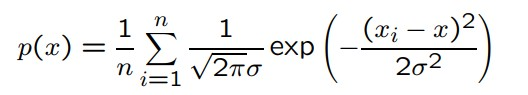

In [ ]:
N_diabetes = len(features_array_diabetes[:,0]) # number of samples
h_diabetes = math.sqrt(N_diabetes) # set the window width equal to the square root of number of samples for class

marginal_pdfs_diab = []
for i in range(0, dimension):
    buffer = np.zeros(N_diabetes)
    for xi in features_array_diabetes[:][i]:
        # the below buffer is used for summation of the gaussians (equation from theory)
        buffer = buffer + (1 / (math.sqrt(2*math.pi)*h_diabetes)) * np.exp((-1 / (2*(h_diabetes**2)))*(features_array_diabetes[:,i] - xi)**2)
    buffer = buffer / N_diabetes
    marginal_pdfs_diab.append(buffer)

pdf_diabetes_parzen = np.ones(marginal_pdfs_diab[0].shape) # initialization for pdf calculation
for marg_pdf in marginal_pdfs_diab:
    pdf_diabetes_parzen = pdf_diabetes_parzen * marg_pdf # calculate product repeatedly

print('pdf estimation for diabetes class (naive bayes using parzen windows)\n')
print(pdf_diabetes_parzen)
print('\n')

In the next cell we calculate **the marginal pdf for each feature** of the samples belonging in **non diabetes class ('Y' = 0)** and then we calculate the estimation for the correspondent pdf as the product of the marginal pdfs (naive bayes approach).

For the computation of the marginal pdfs we use <u>1-d Parzen windows with gaussian kernels, which have standard deviation equal to the width *h* of the window and mean value each sample point</u>, according to the below equation (we replace σ with h):

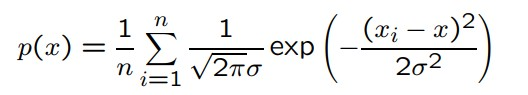

In [ ]:
N_non_diabetes = len(features_array_non_diabetes[:,0]) # number of samples
h_non_diabetes = math.sqrt(N_non_diabetes) # set the window width equal to the square root of number of samples for class

marginal_pdfs_non_diab = []
for i in range(0, dimension):
    buffer = np.zeros(N_non_diabetes)
    for xi in features_array_non_diabetes[:][i]:
        # the below buffer is used for summation of the gaussians (equation from theory)
        buffer = buffer + (1 / (math.sqrt(2*math.pi)*h_non_diabetes)) * np.exp((-1 / (2*(h_non_diabetes**2)))*(features_array_non_diabetes[:,i] - xi)**2)
    buffer = buffer / N_non_diabetes
    marginal_pdfs_non_diab.append(buffer)

pdf_non_diabetes_parzen = np.ones(marginal_pdfs_non_diab[0].shape) # initialization for pdf calculation
for marg_pdf in marginal_pdfs_non_diab:
    pdf_non_diabetes_parzen = pdf_non_diabetes_parzen * marg_pdf # calculate product repeatedly

print('pdf estimation for non diabetes class (naive bayes using parzen windows)\n')
print(pdf_non_diabetes_parzen)
print('\n')

<u>**Goodness of fit measument**</u>

In order to calculate **AIC and BIC criterion** values for each class, we calculate firstly log-likelihood L(θ). For the assumption used for pdfs *k* (the number of estimated parameters for our model) is 1 => <u>the only parameter we can affect is *h* which is the same for every $X_{i}$</u>. Finally, regarding AIC the **general equation** is used, since N/k is more than 40.

In [ ]:
## k = 1 because the only parameter is h which is the same for every Xi
k_parzen = 1
N_diabetes = len(features_array_diabetes[:,0])
N_non_diabetes = len(features_array_non_diabetes[:,0])

diabetes_loglikelihood_parzen = np.log(pdf_diabetes_parzen).sum()
AIC_parzen_diabetes = -2*diabetes_loglikelihood_parzen + 2 * k_parzen
BIC_parzen_diabetes = -2*diabetes_loglikelihood_parzen + k_parzen * math.log(N_diabetes)
print('AIC_parzen_diabetes: ', AIC_parzen_diabetes)
print('BIC_parzen_diabetes: ', BIC_parzen_diabetes)

non_diabetes_loglikelihood_parzen = np.log(pdf_non_diabetes_parzen).sum()
AIC_parzen_non_diabetes = -2*non_diabetes_loglikelihood_parzen + 2 * k_parzen 
BIC_parzen_non_diabetes = -2*non_diabetes_loglikelihood_parzen + k_parzen * math.log(N_non_diabetes)
print('AIC_parzen_non_diabetes: ', AIC_parzen_non_diabetes)
print('BIC_parzen_non_diabetes: ', BIC_parzen_non_diabetes)

#### 2.2 Conclusions regarding the above assumptions based on AIC and BIC criteria

Firstly, we observe that regardless the assumption we use for the pdfs **the AIC and BIC criteria values don't differ for each class significantly**. That is because **the log-likelihood term dominates the result** and this term is <u>the same</u> for both criteria.

The fact that for each assumption the AIC/BIC criteria is almost double for the non diabetes class is justified from the fact that in our dataset the samples belonging to is almost double from diabetes class samples.

As for the comparison between the assumptions, we see that the assumptions for **2.2.b and 2.2.c have the smallest values with 2.2.b being slighly smaller** and so being <u>candidates for better fit</u> of the actual pdfs. **Then comes 2.2.a and the worst candidate (always according to the criteria) is the 2.2.d assumption.**

The above are justified if we take into account that <u>2.2.b assumption is the more complex one and takes into account the possible dependencies between the class features</u>. The 2.2.c assumption however is <u>less complex (since it regards the class features as mutually statistically independent) but still stands as a good candidate</u> for fitting the pdfs because it takes into account the mean and variance of each feature and possibly they features actually follow gaussian distribution. <u>On the other hand the approach with naive bayes and the parzen windows doesn't seem to approach the data well. Finally, the 2.2.a assumption seems to be a simple yet moderately effective fit as it produces much smaller values for AIC and BIC than 2.2.d and not much larger than the other two approaches.</u>

### 2.3

In [ ]:
#  Problem 2 - iii - Bayesian classification utilizing the estimated pdfs from 2ii

# importing the required modules

import pandas as pd
import numpy as np
import math

df = pd.read_csv('pima-indians-diabetes.data', delimiter=',', encoding='ISO-8859–1', names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'])

#### 2.3.a

**Assumption:** "*Pdfs are gaussian, with diagonal covariance matrices. Mean and covariance of the pdfs are estimated using Maximum Likelihood from the available data.*"

Below we define helper functions we are going to use to implement the Bayes Classifier for the above assumption for class pdfs. *We are explaining only any new notions added to the code from question 2.ii since in general it's the same, just grouped for reusability reasons.*

In [ ]:
import pandas as pd
import numpy as np
import math

# this function calculates the mean for a given dataframe
# class_feature is the key corresponding to the class
# class_value is the value corresponding to the class whose mean we are calculating
def calculate_mean_for_class(dataframe, class_feature, class_value):
    mean = np.array([])
    features = dataframe.keys()
    features = features.drop(class_feature)
    for key in features:
        mean = np.append(mean, [dataframe[key][dataframe[class_feature] == class_value].sum()/len(dataframe[key][dataframe[class_feature] == class_value])])
    return mean

# this function calculates the covariance matrix for a given dataframe
# class_mean is the mean for the class
# class_feature is the key corresponding to the class
# class_value is the value corresponding to the class whose mean we are calculating
def calculate_covariance_matrix_for_class(dataframe, class_mean, class_feature, class_value):
    features = dataframe.keys()
    features = features.drop(class_feature)
    dimension = len(features)
    covariance = np.zeros(shape=(dimension, dimension))
         
    N_diabetes = len(dataframe[features[1]][dataframe[class_feature] == class_value])
    buffer = 0
    for i in range(0, dimension):
        buffer = buffer + ((dataframe[features[i]][dataframe[class_feature] == class_value] - class_mean[i]).T).dot(dataframe[features[i]][dataframe[class_feature] == class_value] - class_mean[i])

    sigma = buffer/(dimension*N_diabetes)

    for i in range(0, dimension):
        covariance[i][i] = sigma

    return covariance

# this function calculates pdf for a given test set x
# mean is the mean of the train data
# covariance is the covariance matrix of the train data
def calculate_pdf_for_test_set(x, mean, covariance):
    deter_covariance = np.linalg.det(covariance)
    covariance_inv = np.linalg.inv(covariance)
    dimension = len(mean)
    pdf_x = (1 / ( (2*math.pi)**(dimension/2) * (deter_covariance**(1/2)))) * np.exp((-1/2)*((x.to_numpy()-mean).dot(covariance_inv)).dot((x.to_numpy()-mean).T))
    return pdf_x.diagonal()

# this function does the classification of the points in test set and calculates the accuracy
# prop_class0, prop_class1 are the probabilities for each sample in test set to be in class0 or class1 respectively
# test_set is the test series with the features and the actual class for each feature
# epoch is the repetition we are in the cross validation cycle
def classify_and_calculate_epoch_accuracy(prop_class0, prop_class1, test_set, epoch):  
    classification = []
    for i in range(0, len(prop_class0)):
        # classification of each sample according to which probability is greater
        if prop_class0[i] > prop_class1[i]:
            classification.append(0)
        else:
            classification.append(1)
    # in order to count the accuracy we count the correct classifications
    # by comparing with actual class of each sample and finally divide with the test set size
    correct_classifications = 0
    for i in range(0, len(classification)):
        if classification[i] == test_set['Y'][epoch*len(classification)+i]:
            correct_classifications += 1
        accurracy_percentage = correct_classifications * 100 / len(classification)
    return accurracy_percentage

# this function runs all the necessary steps to calculate the accuracy for a validation epoch
# train_set is our training set for this epoch
# test_set is our test set fot this epoch
# prop_non_diabetes, prop_diabetes are the propabilities for each class for the given dataset in total
# epoch is the repetition step in cross validation
def calculate_accuracy_for_validation_epoch(train_set, test_set, prop_non_diabetes, prop_diabetes, epoch):
    # calculate mean for non diabetes class
    mean_class_non_diabetes = calculate_mean_for_class(train_set, 'Y', 0)
    # calculate covariance for non diabetes class
    covariance_class_non_diabetes = calculate_covariance_matrix_for_class(train_set, mean_class_non_diabetes, 'Y', 0)
    # calculate mean for diabetes class
    mean_class_diabetes = calculate_mean_for_class(train_set, 'Y', 1)
    # calculate covariance for diabetes class
    covariance_class_diabetes = calculate_covariance_matrix_for_class(train_set, mean_class_diabetes, 'Y', 1)
    # calculate pdf for test set for non diabetes class
    pdfs_test_set_class_non_diabetes = calculate_pdf_for_test_set(test_set.drop('Y', axis=1), mean_class_non_diabetes, covariance_class_non_diabetes)
    prop_class_non_diabetes_test_set = pdfs_test_set_class_non_diabetes*prop_non_diabetes
    # calculate pdf for test set for diabetes class
    pdfs_test_set_class_diabetes = calculate_pdf_for_test_set(test_set.drop('Y', axis=1), mean_class_diabetes, covariance_class_diabetes)
    prop_class_diabetes_test_set = pdfs_test_set_class_diabetes*prop_diabetes
    # do the classification, the cross validation and return the accuracy for the current epoch
    return classify_and_calculate_epoch_accuracy(prop_class_non_diabetes_test_set, prop_class_diabetes_test_set, test_set, epoch)


Below we are utilizing the above defined functions to **perform 8-fold cross validation** for our data set

In [ ]:
df = pd.read_csv('pima-indians-diabetes.data',delimiter=',', encoding='ISO-8859–1', names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'])
k = math.ceil(df.index.shape[0] / 8) # 8-Fold cross validation
# the probabibly of each class in our data set is by definition the number of samples belonging in the class
# devided by the size of the data set
class_non_diabetes_prop = df[df['Y'] == 0].shape[0] / df.index.shape[0]
class_diabete_prop = df[df['Y'] == 1].shape[0] / df.index.shape[0]

In [ ]:
##### Pdfs are gaussian, with diagonal covariance matrices
accurracy_percentages = []
for i in range(0, 8):
    accurracy_percentages.append(calculate_accuracy_for_validation_epoch(df.drop(df.index[i*k:(i+1)*k]), df[i*k:(i+1)*k], class_non_diabetes_prop, class_diabete_prop, i))

print(accurracy_percentages)
average_accuracy = sum(accurracy_percentages) / len(accurracy_percentages)

print('Average accuracy for current pdf assumption:\n')
print(round(average_accuracy, 2), '%')
print('\n')


#### 2.3.b

**Assumption:** "*Pdfs are gaussian, with non-diagonal covariance matrices. Means and covariance matrices of the pdfs are estimated using Maximum Likelihood from the available data.*"

Below we define helper functions we are going to use to implement the Bayes Classifier for the above assumption for class pdfs. *We are explaining only any new notions added to the code from question 2.ii since in general it's the same, just grouped for reusability reasons.*

In [ ]:
# this function calculates the mean for a given dataframe
# class_feature is the key corresponding to the class
# class_value is the value corresponding to the class whose mean we are calculating
def calculate_mean_for_class(dataframe, class_feature, class_value):
    mean = np.array([])
    features = dataframe.keys()
    features = features.drop(class_feature)
    for key in features:
        mean = np.append(mean, [dataframe[key][df[class_feature] == class_value].sum()/len(df[key][df[class_feature] == class_value])])
    return mean

# this function calculates the covariance matrix for a given dataframe
# class_mean is the means matrix for the class
# class_feature is the key corresponding to the class
# class_value is the value corresponding to the class whose mean we are calculating
def calculate_covariance_matrix_for_class(dataframe, class_mean, class_feature, class_value):
    features = dataframe.keys()
    features = features.drop(class_feature)
    dimension = len(features)
    covariance = np.zeros(shape=(dimension, dimension))
    for i in range(0, dimension):
        for j in range(0, dimension):
            buffer = (df[features[i]][df[class_feature] == class_value] - class_mean[i])*(df[features[j]][df[class_feature] == class_value] - class_mean[j])
            covariance[i][j] = buffer.sum()/len(buffer)

    return covariance

# this function calculates pdf for a given test set x
# mean is the means matrix of the train data
# covariance is the covariance matrix of the train data
def calculate_pdf_for_test_set(x, mean, covariance):
    deter_covariance = np.linalg.det(covariance)
    covariance_inv = np.linalg.inv(covariance)
    dimension = len(mean)
    pdf_x = (1 / ( (2*math.pi)**(dimension/2) * (deter_covariance**(1/2)))) * np.exp((-1/2)*((x.to_numpy()-mean).dot(covariance_inv)).dot((x.to_numpy()-mean).T))
    return pdf_x.diagonal()

# this function does the classification of the points in test set and calculates the accuracy
# prop_class0, prop_class1 are the probabilities for each sample in test set to be in class0 or class1 respectively
# test_set is the test series with the features and the actual class for each feature
# epoch is the repetition we are in the cross validation cycle
def classify_and_calculate_epoch_accuracy(prop_class0, prop_class1, test_set, epoch):
    classification = []
    for i in range(0, len(prop_class0)):
        # classification of each sample according to which probability is greater
        if prop_class0[i] > prop_class1[i]:
            classification.append(0)
        else:
            classification.append(1)
    # in order to count the accuracy we count the correct classifications
    # by comparing with actual class of each sample and finally divide with the test set size
    correct_classifications = 0
    for i in range(0, len(classification)):
        if classification[i] == test_set['Y'][epoch*len(classification)+i]:
            correct_classifications += 1
    accurracy_percentage = correct_classifications * 100 / len(classification) # we return % percentage
    return accurracy_percentage

# this function runs all the necessary steps to calculate the accuracy for a validation epoch
# train_set is our training set for this epoch
# test_set is our test set fot this epoch
# prop_non_diabetes, prop_diabetes are the propabilities for each class for the given dataset in total
# epoch is the repetition step in cross validation
def calculate_accuracy_for_validation_epoch(train_set, test_set, prop_non_diabetes, prop_diabetes, epoch):
    # calculate mean for non diabetes class
    mean_class_non_diabetes = calculate_mean_for_class(train_set, 'Y', 0)
    # calculate cov matrix for non diabetes class
    covariance_class_non_diabetes = calculate_covariance_matrix_for_class(train_set, mean_class_non_diabetes, 'Y', 0)
    # calculate mean for diabetes class
    mean_class_diabetes = calculate_mean_for_class(train_set, 'Y', 1)
    # calculate cov matrix for non diabetes class
    covariance_class_diabetes = calculate_covariance_matrix_for_class(train_set, mean_class_diabetes, 'Y', 1)
    # calculate pdf for test set for non diabetes class
    pdfs_test_set_class_non_diabetes = calculate_pdf_for_test_set(test_set.drop('Y', axis=1), mean_class_non_diabetes, covariance_class_non_diabetes)
    # calculate probabilities for each sample in test set to be in non diabetes class
    prop_class_non_diabetes_test_set = pdfs_test_set_class_non_diabetes*prop_non_diabetes
    # calculate pdf for test set for diabetes class
    pdfs_test_set_class_diabetes = calculate_pdf_for_test_set(test_set.drop('Y', axis=1), mean_class_diabetes, covariance_class_diabetes)
    # calculate probabilities for each sample in test set to be in diabetes class
    prop_class_diabetes_test_set = pdfs_test_set_class_diabetes*prop_diabetes
    # do the classification, the cross validation and return the accuracy for the current epoch
    return classify_and_calculate_epoch_accuracy(prop_class_non_diabetes_test_set, prop_class_diabetes_test_set, test_set, epoch)



Below we are utilizing the above defined functions to **perform 8-fold cross validation** for our data set

In [ ]:
fold = 8
k = math.ceil(df.index.shape[0] / fold) # 8-Fold cross validation

# the probabibly of each class in our data set is by definition the number of samples belonging in the class
# devided by the size of the data set
class_non_diabetes_prop = df[df['Y'] == 0].shape[0] / df.index.shape[0]
class_diabete_prop = df[df['Y'] == 1].shape[0] / df.index.shape[0]

accurracy_percentages = []
for i in range(0, fold):
  accurracy_percentages.append(calculate_accuracy_for_validation_epoch(df.drop(df.index[i*k:(i+1)*k]), df[i*k:(i+1)*k], class_non_diabetes_prop, class_diabete_prop, i))

print('Accuracy percentages for each "epoch":\n')
print(accurracy_percentages)
print('\n')

average_accuracy = sum(accurracy_percentages) / len(accurracy_percentages)

print('Average accuracy for current pdf assumption:\n')
print(round(average_accuracy, 2), '%')
print('\n')

#### 2.3.c

**Assumption:** "*Components of the feature vectors are mutually statistically independent (the usual naïve Bayes approach). Marginal Pdfs are gaussian, with parameters (mean, variance) estimated using Maximum Likelihood from the available data.*"

Below we define helper functions we are going to use to implement the Bayes Classifier for the above assumption for class pdfs. *We are explaining only any new notions added to the code from question 2.ii since in general it's the same, just grouped for reusability reasons.*

In [ ]:
# this function calculates the mean for a given dataframe and for every feature
# class_feature is the key corresponding to the class
# class_value is the value corresponding to the class whose mean we are calculating
#feature_value is the value for the current feature
def calculate_mean_per_feature_for_class(dataframe, class_feature, class_value, feature_value):
    N_diabetes_feature = len(dataframe[feature_value][dataframe[class_feature] == class_value])
    features_diabetes = dataframe[feature_value][dataframe[class_feature] == class_value]
    mean =  dataframe[feature_value][dataframe[class_feature] == class_value].sum()/len(dataframe[feature_value][dataframe[class_feature] == class_value])
    return mean
                      
# this function calculates the variance for a given dataframe and for every feature
# class_feature is the key corresponding to the class
# class_value is the value corresponding to the class whose mean we are calculating
#feature_value is the value for the current feature
def calculate_variance_per_feature_for_class(dataframe,mean, class_feature, class_value, feature_value):
    N_diabetes_feature = len(dataframe[feature_value][dataframe[class_feature] == class_value])
    features_diabetes = dataframe[feature_value][dataframe[class_feature] == class_value]  
    buffer_marg = 0
                                               
    for xi in features_diabetes:
        buffer_marg = buffer_marg + (xi - mean)*(xi - mean)
      
    variance = buffer_marg/(N_diabetes_feature) 
    return variance

# this function calculates pdf for the marginal pdfs for a given test set x
# mean is the mean of the train data
# covariance is the covariance matrix of the train data
def calculate_pdf_marginal_for_test_set(x,mean, variance,class_feature,class_value,marginal_pdfs,feature_value):                                               
    buffer_array = x[feature_value]-mean
    buffer = (1 / ( (2*math.pi)**(1/2) * (variance**(1/2)))) * np.exp((-1/2)*(buffer_array**2)/(variance))
    marginal_pdfs.append(buffer)
    
    return marginal_pdfs

# this function calculates the total pdf according to the marginal pdfs which are calculated
# marginal_pdfs the marginal gaussian pdfs
def calculate_total_pdf(marginal_pdfs):
    pdf_gaussian = np.ones(marginal_pdfs[0].shape)
    for marg_pdf in marginal_pdfs:
        pdf_gaussian = pdf_gaussian * marg_pdf
    return pdf_gaussian

# this function does the classification of the points in test set and calculates the accuracy
# prop_class0, prop_class1 are the probabilities for each sample in test set to be in class0 or class1 respectively
# test_set is the test series with the features and the actual class for each feature
# epoch is the repetition we are in the cross validation cycle
def classify_and_calculate_epoch_accuracy_with_marginal(prop_class0, prop_class1, test_set, epoch):
    classification = []
    for i in range(0, len(prop_class0)):
        if prop_class0[i] > prop_class1[i]:
            classification.append(0)
        else:
            classification.append(1)
    correct_classifications = 0
    for i in range(0, len(classification)):
        if classification[i] == test_set['Y'][epoch*len(classification)+i]:
            correct_classifications += 1
    accurracy_percentage = correct_classifications * 100 / len(classification)
    return accurracy_percentage

# this function runs all the necessary steps to calculate the accuracy for a validation epoch
# In this case firstly we calculate the mean and the variance for each feature in order to calculate the marginal gaussian pdfs
# and then we calculate the total pdf.
# train_set is our training set for this epoch
# test_set is our test set fot this epoch
# prop_non_diabetes, prop_diabetes are the propabilities for each class for the given dataset in total
# epoch is the repetition step in cross validation
def calculate_accuracy_marginal_for_validation_epoch(train_set, test_set, prop_non_diabetes, prop_diabetes, epoch):  
    features = train_set.keys()
    features = features.drop('Y')
    dimension = len(features)
    marginal_pdfs_test_set_class_non_diabetes = []
    marginal_pdfs_test_set_class_diabetes = []
    for i in range(0,dimension):
        # calculate mean for non diabetes class
        mean_class_per_feature_non_diabetes = calculate_mean_per_feature_for_class(train_set, 'Y', 0,features[i])
        # calculate variance for non diabetes class
        variance_class_per_feature_non_diabetes = calculate_variance_per_feature_for_class(train_set, mean_class_per_feature_non_diabetes, 'Y', 0,features[i])
        # calculate mean for diabetes class
        mean_class_per_feature_diabetes = calculate_mean_per_feature_for_class(train_set, 'Y', 1,features[i])
        # calculate variance for diabetes class
        variance_class_per_feature_diabetes = calculate_variance_per_feature_for_class(train_set, mean_class_per_feature_diabetes, 'Y', 1,features[i])
        # calculate the marginal pdfs for non diabetes class
        marginal_pdfs_test_set_class_non_diabetes = calculate_pdf_marginal_for_test_set(test_set, mean_class_per_feature_non_diabetes, variance_class_per_feature_non_diabetes,'Y',1,marginal_pdfs_test_set_class_non_diabetes,features[i])        
        # calculate the marginal pdfs for diabetes class
        marginal_pdfs_test_set_class_diabetes = calculate_pdf_marginal_for_test_set(test_set, mean_class_per_feature_non_diabetes, variance_class_per_feature_non_diabetes,'Y',1,marginal_pdfs_test_set_class_diabetes,features[i])
    # calculate the total pdf for non diabetes class
    total_gaussian_pdf_non_diabetes = calculate_total_pdf(marginal_pdfs_test_set_class_non_diabetes)    
    # calculate the total pdf for diabetes class
    total_gaussian_pdf_diabetes = calculate_total_pdf(marginal_pdfs_test_set_class_diabetes)
    prop_class_non_diabetes_test_set = total_gaussian_pdf_non_diabetes.to_numpy()*prop_non_diabetes
    prop_class_diabetes_test_set = total_gaussian_pdf_diabetes.to_numpy()*prop_diabetes
    # do the classification, the cross validation and return the accuracy for the current epoch
    return classify_and_calculate_epoch_accuracy_with_marginal(prop_class_non_diabetes_test_set, prop_class_diabetes_test_set, test_set, epoch)


Below we are utilizing the above defined functions to **perform 8-fold cross validation** for our data set

In [ ]:
df = pd.read_csv('pima-indians-diabetes.data',delimiter=',', encoding='ISO-8859–1', names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'])
k = math.ceil(df.index.shape[0] / 8) # 8-Fold cross validation

# the probabibly of each class in our data set is by definition the number of samples belonging in the class
# devided by the size of the data set
class_non_diabetes_prop = df[df['Y'] == 0].shape[0] / df.index.shape[0]
class_diabete_prop = df[df['Y'] == 1].shape[0] / df.index.shape[0]


In [ ]:
##### Marginal Pdfs are gaussian,ML method
accurracy_percentages_with_marginals = []
for i in range(0, 8):
    accurracy_percentages_with_marginals.append(calculate_accuracy_marginal_for_validation_epoch(df.drop(df.index[i*k:(i+1)*k]), df[i*k:(i+1)*k], class_non_diabetes_prop, class_diabete_prop, i))

print(accurracy_percentages_with_marginals)
average_accuracy = sum(accurracy_percentages_with_marginals) / len(accurracy_percentages_with_marginals)

print('Average accuracy for current pdf assumption:\n')
print(round(average_accuracy, 2), '%')
print('\n')


#### 2.3.d

**Assumption:** "*Components of the feature vectors are mutually statistically independent (the usual naïve Bayes approach). Marginal pdfs are computed using 1-d Parzen windows with gaussian kernels. Take the width h of each window equal to the square root of the number of patterns in the available data.*"

Below we define helper functions we are going to use to implement the Bayes Classifier for the above assumption for class pdfs. *We are explaining only any new notions added to the code from question 2.ii since in general it's the same, just grouped for reusability reasons.*

In [ ]:
# this function calculates the pdf for the test set using 1-d parzen windows with gaussian kernels for the marginal pdfs
# it receives 2 arguments: the training and the test set in the form of pandas series
def calculate_pdf_parzen_for_test_set(x_train, x_test):
    x_train_array = x_train.to_numpy() # turn train series into array
    x_test_array = x_test.to_numpy() # turn test series into array
    N = x_train_array.shape[0] # size of training set
    h = math.sqrt(N) # set the window width equal to the square root of number of samples for class
    dimension = x_train_array.shape[1] # problem dimensionality
    
    # marginal pdfs calculation
    marginal_pdfs = []
    for i in range(0, dimension):
        buffer = np.zeros(x_test_array.shape[0])
        for xi in x_train_array[:][i]:
            buffer = buffer + (1 / (math.sqrt(2*math.pi)*h)) * np.exp((-1 / (2*(h**2)))*(x_test_array[:,i] - xi)**2)
        buffer = buffer / N
        marginal_pdfs.append(buffer)
    
    # pdf calculation as product of the marginal pdfs according to naive bayes approach
    pdf_parzen = np.ones(marginal_pdfs[0].shape)
    for marg_pdf in marginal_pdfs:
        pdf_parzen = pdf_parzen * marg_pdf
    return pdf_parzen

# this function does the classification of the points in test set and calculates the accuracy
# prop_class0, prop_class1 are the probabilities for each sample in test set to be in class0 or class1 respectively
# test_set is the test series with the features and the actual class for each feature
# epoch is the repetition we are in the cross validation cycle
def classify_and_calculate_epoch_accuracy(prop_class0, prop_class1, test_set, epoch):
    classification = []
    for i in range(0, len(prop_class0)):
        # classification of each sample according to which probability is greater
        if prop_class0[i] > prop_class1[i]:
            classification.append(0)
        else:
            classification.append(1)
    # in order to count the accuracy we count the correct classifications
    # by comparing with actual class of each sample and finally divide with the test set si
    correct_classifications = 0
    for i in range(0, len(classification)):
        if classification[i] == test_set['Y'][epoch*len(classification)+i]:
            correct_classifications += 1
    accurracy_percentage = correct_classifications * 100 / len(classification) # we return % percentage
    return accurracy_percentage

# this function runs all the necessary steps to calculate the accuracy for a validation epoch
# train_set is our training set for this epoch
# test_set is our test set fot this epoch
# prop_non_diabetes, prop_diabetes are the propabilities for each class for the given dataset in total
# epoch is the repetition step in cross validation
def calculate_accuracy_parzen_for_validation_epoch(train_set, test_set, prop_non_diabetes, prop_diabetes, epoch):
    # calculate pdf for test set for non diabetes class
    pdfs_parzen_test_set_class_non_diabetes = calculate_pdf_parzen_for_test_set(train_set[train_set['Y'] == 0].drop('Y', axis=1), test_set.drop('Y', axis=1))
    # calculate probabilities for each sample in test set to be in non diabetes class
    prop_class_non_diabetes_test_set = pdfs_parzen_test_set_class_non_diabetes*prop_non_diabetes
    # calculate pdf for test set for diabetes class
    pdfs_parzen_test_set_class_diabetes = calculate_pdf_parzen_for_test_set(train_set[train_set['Y'] == 1].drop('Y', axis=1), test_set.drop('Y', axis=1))
    # calculate probabilities for each sample in test set to be in diabetes class
    prop_class_diabetes_test_set = pdfs_parzen_test_set_class_diabetes*prop_diabetes
    # do the classification, the cross validation and return the accuracy for the current epoch
    return classify_and_calculate_epoch_accuracy(prop_class_non_diabetes_test_set, prop_class_diabetes_test_set, test_set, epoch)

Below we are utilizing the above defined functions to **perform 8-fold cross validation** for our data set

In [ ]:
fold = 8
k = math.ceil(df.index.shape[0] / fold) # 8-Fold cross validation

# the probabibly of each class in our data set is by definition the number of samples belonging in the class
# devided by the size of the data set
class_non_diabetes_prop = df[df['Y'] == 0].shape[0] / df.index.shape[0]
class_diabete_prop = df[df['Y'] == 1].shape[0] / df.index.shape[0]

accurracy_percentages_parzen = []
for i in range(0, fold):
    accurracy_percentages_parzen.append(calculate_accuracy_parzen_for_validation_epoch(df.drop(df.index[i*k:(i+1)*k]), df[i*k:(i+1)*k], class_non_diabetes_prop, class_diabete_prop, i))

print('Accuracy percentages for each "epoch":\n')
print(accurracy_percentages_parzen)
print('\n')

average_accuracy_parzen = sum(accurracy_percentages_parzen) / len(accurracy_percentages_parzen)

print('Average accuracy for current pdf assumption:\n')
print(round(average_accuracy_parzen, 2), '%')
print('\n')

#### 2.3 Conclusions and comparison with k-NN classifier



We **would expect** that more accurate estimates for the pdfs always tend to improve accuracy as well. **However, the results show us that this is partly true**. For example in 2.2 question we saw that the best and worst candidates for pdfs estimation where the assumptions in b and d sub-question respectively. **The average accuracy for these two Bayes classifiers proves this**.

<u>**This is not the case though regarding the assumptions in a and c sub-question**</u>. First of all, the naive bayes approach for sub-question c had approximately the same AIC and BIC values with b sub-question. **However, it's average accuracy is about 10% worst than the approach with the non-diagonal covariance matrices for the pdfs, which shows us that probably the features/components are not mutually statistically independent**. Moreover, <u>the accuracy for sub-question c pdf assuption is slightly worse than the approach with the diagonal covariance matrices of sub-question a</u>, although according to AIC and BIC criteria the later is a less accurate estimate of the pdf.

***From all the above we conclude that the AIC/BIC criteria are a good first measure of aborting some estimates or tend in favour of some others, but not always say the truth about the actual accuracy of the classifier.***

**In comparison with the k-NN classifier from 2.1**, we observe that <u>the best Bayes classifier</u> from the assumptions conducted has about <u>5% better accuracy than the best k-NN classifier</u>. However, the <u>k-NN classifier</u> for all the range of k performs with **accuracy above 65%** whereas the rest Bayes classifiers based on an assumption different than the best one produce less accurate results, which depending on how bad an assumption about the pdfs is may be even less than 50% accurate.

### 2.4

Import modules

In [16]:
from csv import reader
import numpy as np

Functions
> General functions



In [17]:
# Read data from file
def load_file(filename):
    dataset = list()
    count = 0
    with open(filename, 'r') as file:
        file_reader = reader(file)
        for row in file_reader:
            count += 1  #count rows
            if not row:
                continue
            dataset.append(row)
    return (dataset, count)


# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())




> Specific functions used in main perceptron algorithm



In [18]:
def multiply_data_w_weights(input, w):
    t_w_x = 0
    for idx, inp in enumerate(input):
        t_w_x += w[idx]*inp
    return t_w_x

# returns line vector for update or 0 vector for not update
def activation_f(t_w_x, epsilon, line):
    if t_w_x < epsilon:
        return line           #Update
    else:
        return [0]*len(line)  #No Update


def activation_decision(t_w_x, epsilon):
    if t_w_x < epsilon:
        return 1  #Update
    else:
        return 0  #No Update

# Creates 2 classes noting one class as '(1)' and '(-1)' for the other 2
# Also multiply elements by target output (x*t)
def create_two_classes(dataset, cl_a):
    new_a=list()

    for i in dataset:
        k=list()
        if i[-1] == cl_a:
            i[-1] = -1
            new_a.append(i)
        else:
            # # for idx,j in enumerate(i):
            k=[j * -1 for j in i]
            i=k
            i[-1] = 1
            new_a.append(i)
    return (new_a)


def update_weights(dw,w_prev):
    w_new=list()
    for idx,el in enumerate(w_prev):
        w_new.append(el+dw[idx])
    return w_new

Main Classification Algorithm

In [19]:
def classify_sets(w_dataset,epsilon,row_len,sel):

    #Initialize variables
    upd_vector = []
    weights=[0.0]*row_len   #initial weight vector
    w_prev=[1]*row_len
    line_prev=[0]*row_len

    # Parameters
    count=0
    epochs_number=1000
  
    # lines of file
    lin_sep =[0]*(num_lines-1)  #last line of file that is counted has no data

    for rep in range(epochs_number):

        upd_vector=[]

        for idx,line in enumerate(w_dataset):
            dw=[]
            w_prev=weights
            twx = multiply_data_w_weights(line, weights)  #t*weight*data
            upd_vector.append(activation_decision(twx, epsilon))
            dw =activation_f(twx, epsilon, line)    
            weights=update_weights(dw,w_prev)

        if upd_vector!=lin_sep:
            count+=1
 
    if upd_vector==lin_sep:
        print("The dataset", str(sel), "is linear separable with the group of the rest two.\nThe perceptron algorithm converged in",str(count), "epoch(s)\n")
        print("Hyperplane dimensions", weights,'\n\n')   
    else:
        print("The dataset", str(sel), "is not linear separable with the group of the rest two.\nThe perceptron algorithm did not converge after:", str(epochs_number), "epoch(s)\n\n")

    return None

Main

>**Prepare** dataset element types

> **Classify** one dataset against the other two classes left 

In [20]:
# Main 
epsilon= 1
num_lines = 0
filenameX = 'iris.data'
in_dataset, num_lines = load_file(filenameX)

# convert input from string to numbers
row_len = len(in_dataset[0])
for i in range(row_len-1):    
    str_column_to_float(in_dataset, i)

# Replace class names with numbers (like a dictionary: 1 for 'Iris-setosa', 2 for 'Iris-setosa', 3 for 'Iris-virginica')
correlate_dict = dict()
class_names = sorted(set([row[-1] for row in in_dataset]))
for i, cl_name in enumerate(class_names,1):
    correlate_dict[cl_name] = i
for row in in_dataset:
    row[-1] = correlate_dict[row[-1]]   #here we substitute class name "iris-setosa with 1.. etc.."

# Results
print("We note: \n1: for 'Iris-setosa', \n2: for 'Iris-versicolor', \n3: for 'Iris-virginica'\n")

for sel in range(1,4):
    y_dataset = create_two_classes(in_dataset,int(sel))
    classify_sets(y_dataset,epsilon,row_len,sel)

We note: 
1: for 'Iris-setosa', 
2: for 'Iris-versicolor', 
3: for 'Iris-virginica'

The dataset 1 is linear separable with the group of the rest two.
The perceptron algorithm converged in 4 epoch(s)

Hyperplane dimensions [1.299999999999999, 5.1, -6.800000000000001, -3.0999999999999996, -1.0] 


The dataset 2 is not linear separable with the group of the rest two.
The perceptron algorithm did not converge after: 1000 epoch(s)


The dataset 3 is not linear separable with the group of the rest two.
The perceptron algorithm did not converge after: 1000 epoch(s)




From the results above we can have an insight about the *relevance* among the classes: 1, 2 & 3.

Since the only possible combination that can be linear **separable** with a hyper plane is: class 1 separated by the group of [class 2 & class 3]
(and it is NOT possible that class 2 to be separated by group [class 1 & class 3], or class 3 to be separated by group [class 1 & class 2]),we can conclude that there is a bigger "entanglement" or "**relevance**" between the data of class 2 & class 3.